In [79]:
import pandas as pd

In [80]:
Table1_MyAnimeListAnime = pd.read_csv('Data/animes.csv')
Table1_MyAnimeListAnime

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


# EDA for Table 1

### missing values

In [81]:
# checking missing value
missing_values = Table1_MyAnimeListAnime.isnull().sum()
print(missing_values)
print(missing_values.sum())

uid              0
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
img_url        180
link             0
dtype: int64
5652


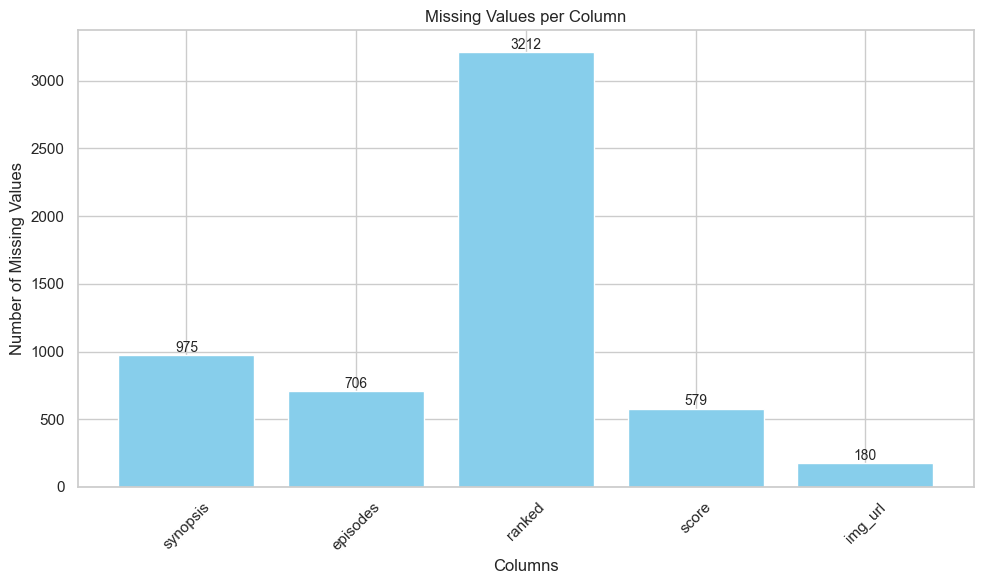

In [82]:
# visualize missing value
import matplotlib.pyplot as plt
missing_counts =Table1_MyAnimeListAnime.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
# visualize it
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(missing_counts.index, missing_counts.values, color='skyblue')
# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)
ax.set_title('Missing Values per Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### duplicates

In [83]:
# find duplicates sum
num_duplicates = Table1_MyAnimeListAnime.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
duplicates = Table1_MyAnimeListAnime[Table1_MyAnimeListAnime.duplicated()]
print("Duplicate rows:")
print(duplicates)

Number of duplicate rows: 2943
Duplicate rows:
         uid                                              title  \
3065   18483  Bishoujo Animerama: Manami no Michi Tono Sou N...   
3071   29111  Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho   
3077   28891                            Haikyuu!! Second Season   
3078   23273                            Shigatsu wa Kimi no Uso   
3079   34599                                      Made in Abyss   
...      ...                                                ...   
19306  32979                                      Flip Flappers   
19307    123                                      Fushigi Yuugi   
19308   1281                                   Gakkou no Kaidan   
19309    450        InuYasha Movie 2: Kagami no Naka no Mugenjo   
19310     87           Mobile Suit Gundam: Char's Counterattack   

                                                synopsis  \
3065                A mix of animation and live-action.    
3071                        

From the EDA, we can see that there are missing values in synopsis, episodes, ranked, score, and img_url, and they are in total 5652. As for the duplicates, we found 2943 duplicates (this does not include the first occurance). 

# Data Cleaning for Table 1

### remove duplicates

In [84]:
# remove duplicates using title
df_clean = Table1_MyAnimeListAnime.drop_duplicates(subset="title")
df_clean

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


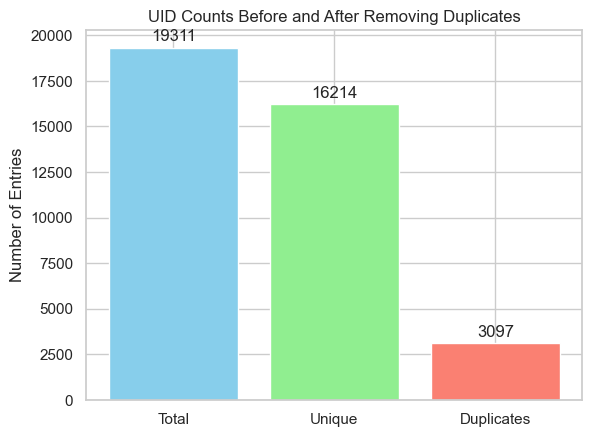

In [85]:
# see the duplicates with plots
total = len(Table1_MyAnimeListAnime)
unique = len(df_clean)
duplicate_count = total - unique

labels = ["Total", "Unique", "Duplicates"]
values = [total, unique, duplicate_count]
colors = ["skyblue", "lightgreen", "salmon"]

plt.bar(labels, values, color=colors)
plt.title("UID Counts Before and After Removing Duplicates")
plt.ylabel("Number of Entries")

# label values
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, str(v), ha='center', va='bottom')
plt.show()

### Replace missing values with suitable data

In [86]:
# 'synopsis', 'img_url', 'ranked' are already in NanN format so we stay as it is
missing_specific = df_clean[df_clean[['synopsis', 'img_url', 'ranked']].isna().any(axis=1)]
print("'synopsis', 'img_url', or 'ranked' are in NaN format")
print(missing_specific)

'synopsis', 'img_url', or 'ranked' are in NaN format
         uid                                              title synopsis  \
29      9563                     Hidamari Sketch x ☆☆☆ Specials      NaN   
31     33280       Gochuumon wa Usagi Desu ka??: Dear My Sister      NaN   
42     36160                         Yaoguai Mingdan 2nd Season      NaN   
212    36370    Ginga Eiyuu Densetsu: Die Neue These - Seiran 2      NaN   
216    39565   Boku no Hero Academia the Movie 2: Heroes:Rising      NaN   
...      ...                                                ...      ...   
18722  34649     Soukyuu no Fafner: Dead Aggressor - The Beyond      NaN   
18751  39638  Choujigen Game Neptune The Animation: Nep no N...      NaN   
18783   2634                      Doraemon: Doraemon Comes Back      NaN   
18942  38740                                   Bai She: Yuan Qi      NaN   
18954  39912                       Wan Jie Xian Zong 2nd Season      NaN   

                                  

In [87]:
# replace missing values in episodes and score with mean
df_clean['episodes'] = df_clean['episodes'].fillna(df_clean['episodes'].mean())
df_clean['score'] = df_clean['score'].fillna(df_clean['score'].mean())
df_clean

/var/folders/ds/32f_n2116jl1zc023sw_k7t80000gn/T/ipykernel_91800/851107714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['episodes'] = df_clean['episodes'].fillna(df_clean['episodes'].mean())
/var/folders/ds/32f_n2116jl1zc023sw_k7t80000gn/T/ipykernel_91800/851107714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['score'] = df_clean['score'].fillna(df_clean['score'].mean())


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


### check outliers

In [ ]:
# outliers in score
Q1 = df_clean["score"].quantile(0.25)
Q3 = df_clean["score"].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
no_outliers = df_clean[(df_clean["score"] >= lower_bound) & (df_clean["score"] <= upper_bound)]

In [99]:
# outliers in popularity
Q1 = df_clean["popularity"].quantile(0.25)
Q3 = df_clean["popularity"].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
no_outliers = df_clean[(df_clean["popularity"] >= lower_bound) & (df_clean["popularity"] <= upper_bound)]

# Cleaned Table 1 Visualization

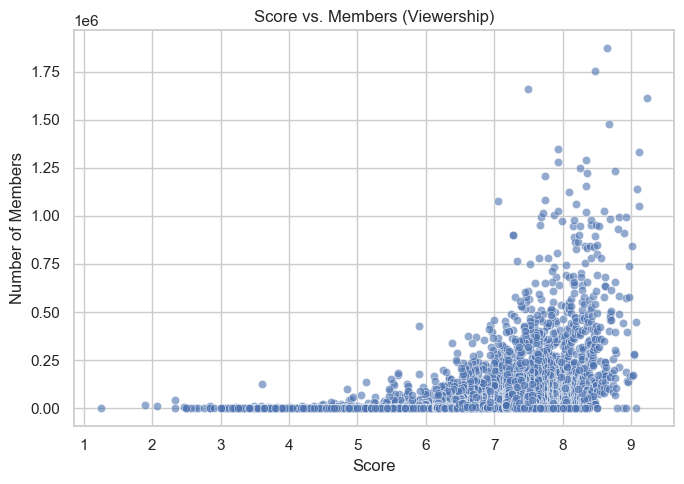

In [97]:
# scores and viewership (maybe related to research question 3)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=no_outliers, x="score", y="members", alpha=0.6)
plt.title("Score vs. Members (Viewership)")
plt.xlabel("Score")
plt.ylabel("Number of Members")
plt.tight_layout()
plt.show()

/var/folders/ds/32f_n2116jl1zc023sw_k7t80000gn/T/ipykernel_91800/359524829.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


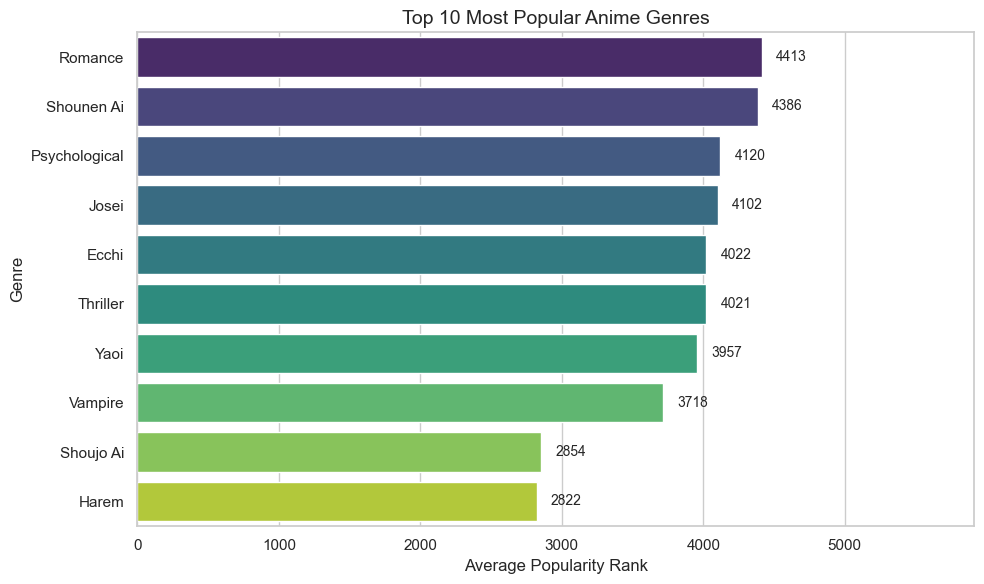

In [98]:
# Copy and clean
df_genre_pop = no_outliers.copy()
df_genre_pop["genre_split"] = df_genre_pop["genre"].str.replace(r"[\[\]']", "", regex=True).str.split(", ")
genre_exploded = df_genre_pop.explode("genre_split")

# Get top 10 genres with lowest average popularity rank
avg_pop_by_genre = (
    genre_exploded.groupby("genre_split")["popularity"]
    .mean()
    .sort_values()
    .head(10)
    .sort_values(ascending=False)  # Reverse the order for display
)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=avg_pop_by_genre.values,
    y=avg_pop_by_genre.index,
    palette="viridis"
)

# Add value labels
for i, value in enumerate(avg_pop_by_genre.values):
    barplot.text(value + 100, i, f"{value:.0f}", va='center', fontsize=10)

# Format
plt.title("Top 10 Most Popular Anime Genres", fontsize=14)
plt.xlabel("Average Popularity Rank")
plt.ylabel("Genre")
plt.xlim(0, avg_pop_by_genre.values.max() + 1500)
plt.tight_layout()
plt.show()


## EDA for Table 2

In [100]:
Table2_MyAnimeListCharacter = pd.read_csv('Data/characters.csv')
Table2_MyAnimeListCharacter

,mal_id,name,name_kanji,nicknames,favorites,about,main_picture,url
0,417,Lelouch Lamperouge,ルルーシュ・ランペルージ,"['Lelouch vi Britannia', 'Zero', 'Lulu', 'Blac...",156066,"Age: 17 (first season), 18 (second season)\nDa...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/417/Lelouch_...
1,45627,Levi,リヴァイ,[],130849,"Birthday: December 25\nHeight: 160 cm (5'3"")\n...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/45627/Levi
2,71,L Lawliet,エル ローライト,"['Ryuga Hideki', 'Ryuzaki', 'Eraldo Coil', 'De...",119353,"Birthday: October 31, 1979 (1982 in anime)\nZo...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/71/L_Lawliet
3,40,Luffy Monkey D.,モンキー・D・ルフィ,"['Mugiwara', 'Straw Hat', 'Lucy', 'Luffytaro']",118163,"Age: 17; 19\nBirthdate: May 5, Taurus\nHeight:...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/40/Luffy_Mon...
4,62,Zoro Roronoa,ロロノア・ゾロ,"['Pirate Hunter', 'Marimo', 'Zorojuro', 'King ...",94312,"Age: 19; 21\nBirthdate: November 11, Scorpio \...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/62/Zoro_Roronoa
...,...,...,...,...,...,...,...,...
146044,214031,Erika Jiyanome,蛇ノ目 エリカ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214031/Erika...
146045,214032,Hibana Kagari,篝 ヒバナ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214032/Hiban...
146046,214044,Cashel,カシェル,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214044/Cashel
146047,214045,Raj,ラジ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214045/Raj


In [94]:
Table3_JikanAPI =  pd.read_csv('Data/myanimelist_data.csv')
Table3_JikanAPI

,mal_id,type,source,airing,rating,members,score_by,favorites,studios
0,1,TV,Original,False,R - 17+ (violence & profanity),1960770,1012498,86086,Sunrise
1,5,Movie,Original,False,R - 17+ (violence & profanity),395626,224147,1689,Bones
2,6,TV,Manga,False,PG-13 - Teens 13 or older,798229,387053,16746,Madhouse
3,7,TV,Original,False,PG-13 - Teens 13 or older,122441,45164,669,Sunrise
4,8,TV,Manga,False,PG - Children,16230,6945,16,Toei Animation
...,...,...,...,...,...,...,...,...,...
125,147,TV,Visual novel,False,R+ - Mild Nudity,146523,70101,1079,Studio Fantasia
126,148,TV,Visual novel,False,PG-13 - Teens 13 or older,10186,3109,10,Studio Deen
127,149,TV,Manga,False,PG-13 - Teens 13 or older,144244,71631,1293,J.C.Staff
128,150,TV,Original,False,R - 17+ (violence & profanity),387961,162448,4448,Production I.G


In [95]:
IntegratedTable = pd.read_csv('Data/integrated_anime_data.csv')
IntegratedTable

,Anime_ID,Anime_Title,Anime_Synopsis,Anime_Genres,Anime_Episodes,Anime_Viewers_2025,Anime_Viewers_2020,Anime_Popularity,Anime_Score,Anime_Character_Name,Anime_Character_Favorites,Anime_Character_Name_Kanji,Anime_Type,Anime_Source,Anime_Rating,Anime_Voted_By,Anime_Favorites,Anime_Studios
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",26.0,1960770,930311,39,8.81,Spike Spiegel,42904.0,スパイク・スピーゲル,TV,Original,R - 17+ (violence & profanity),1012498,86086,Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",1.0,395626,223199,475,8.40,Ichigo Kurosaki,27723.0,黒崎 一護,Movie,Original,R - 17+ (violence & profanity),224147,1689,Bones
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",26.0,798229,460146,158,8.28,Rukia Kuchiki,7275.0,朽木 ルキア,TV,Manga,PG-13 - Teens 13 or older,387053,16746,Madhouse
3,7,Witch Hunter Robin,Witches are individuals with special powers li...,"['Action', 'Magic', 'Police', 'Supernatural', ...",26.0,122441,85182,1278,7.32,Orihime Inoue,2460.0,井上 織姫,TV,Original,PG-13 - Teens 13 or older,45164,669,Sunrise
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",52.0,16230,12319,3968,7.02,NaN,NaN,NaN,TV,Manga,PG - Children,6945,16,Toei Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,147,Kimi ga Nozomu Eien,"In the warmth of a golden sun, timid high scho...","['Drama', 'Romance', 'Slice of Life']",14.0,146523,114690,983,7.31,Kenshin Himura,12319.0,緋村 剣心,TV,Visual novel,R+ - Mild Nudity,70101,1079,Studio Fantasia
126,148,Kita e.: Diamond Dust Drops,"If a couple sees the diamond dust together, th...","['Drama', 'Romance', 'Slice of Life']",12.0,10186,7253,4936,6.69,Kaoru Kamiya,316.0,神谷 薫,TV,Visual novel,PG-13 - Teens 13 or older,3109,10,Studio Deen
127,149,Loveless,"In the world of Loveless , each person is bor...","['Action', 'Mystery', 'Supernatural', 'Drama',...",12.0,144244,109331,1021,7.03,Sanosuke Sagara,1128.0,相楽佐之助,TV,Manga,PG-13 - Teens 13 or older,71631,1293,J.C.Staff
128,150,Blood+,Saya Otonashi is a seemingly ordinary girl liv...,"['Action', 'Military', 'Mystery', 'Horror', 'S...",50.0,387961,284268,344,7.73,Yahiko Myoujin,102.0,明神 弥彦,TV,Original,R - 17+ (violence & profanity),162448,4448,Production I.G


## Data Cleaning